# Ayuho Negishi

### Host Behaviour & Market Competitiveness: *How do different host strategies impact listing success and guest satisfaction?* 

Host behaviours shape listing success and guest satisfaction on Airbnb. This EDA explores how identity verification, superhost status, response time, acceptance rate, and pricing strategies influence market competitiveness and guest experiences.

#### Key research questions
- How does host identity verification influence the success of a listing (in terms of reviews and ratings)?
- How do host responses (e.g. response time, acceptance rate) differ between superhosts and non-superhosts, and how does this impact listing success?
- How do hosts with multiple listings strategically set their pricing, and how does this impact guest satisfaction?

## EDA

### Imports

In [1]:
import sys
import os

sys.path.append(os.path.abspath("../../code"))

import altair as alt
import pandas as pd

from toolz.curried import pipe

def json_dir(data, data_dir='altairdata'):
    os.makedirs(data_dir, exist_ok=True)
    return pipe(data, alt.to_json(filename=data_dir + '/{prefix}-{hash}.{extension}') )

# Register and enable the new transformer
alt.data_transformers.register('json_dir', json_dir)
alt.data_transformers.enable('json_dir')

# Handle large data sets (default shows only 5000)
# See here: https://altair-viz.github.io/user_guide/data_transformers.html
alt.data_transformers.disable_max_rows()

alt.renderers.enable('jupyterlab')
from cleaning_workflows import prepare_dataset

In [2]:
# alt.data_transformers.disable_max_rows()

### Loading in the data

In [3]:
df = pd.read_csv('../../data/raw/listings.csv', parse_dates=['first_review', 'last_review'])
df_cleaned = prepare_dataset(df)

In [4]:
print(df_cleaned.shape)
print(df_cleaned.columns)

(37784, 57)
Index(['name', 'description', 'neighborhood_overview', 'host_id', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy

In [5]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 57 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   name                                          37784 non-null  object        
 1   description                                   37784 non-null  object        
 2   neighborhood_overview                         37784 non-null  object        
 3   host_id                                       37784 non-null  int64         
 4   host_since                                    37784 non-null  datetime64[ns]
 5   host_location                                 37784 non-null  object        
 6   host_about                                    37784 non-null  object        
 7   host_response_time                            37784 non-null  object        
 8   host_response_rate                            37784 non-null  floa

In [6]:
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns.tolist()
print(numerical_cols)

['host_id', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']


In [7]:
object_cols = df_cleaned.select_dtypes(include=['object']).columns
print(object_cols)

Index(['name', 'description', 'neighborhood_overview', 'host_location',
       'host_about', 'host_response_time', 'host_neighbourhood',
       'host_verifications', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'amenities'],
      dtype='object')


In [8]:
df_cleaned.describe().drop(columns=['latitude', 'longitude', 'host_id'])

,host_since,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,37784,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,...,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000
mean,2017-03-06 09:48:26.373067776,0.952508,0.812859,263.054864,351.429229,2.754896,1.119654,1.321723,1.383946,170.434126,...,4.704505,4.870094,4.867555,4.775639,4.676217,71.636354,45.435555,23.985232,0.005187,0.685365
min,2008-08-11 00:00:00,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2014-07-07 00:00:00,1.000000,0.840000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,113.750000,...,4.690000,4.890000,4.900000,4.750000,4.670000,1.000000,0.000000,0.000000,0.000000,0.160000
50%,2016-08-02 00:00:00,1.000000,0.880000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,132.000000,...,4.810000,4.950000,4.960000,4.850000,4.760000,2.000000,1.000000,1.000000,0.000000,0.290000
75%,2019-10-29 00:00:00,1.000000,0.950000,10.000000,15.000000,4.000000,1.000000,1.000000,1.000000,156.000000,...,4.910000,5.000000,5.000000,4.950000,4.850000,9.000000,2.000000,2.000000,0.000000,0.550000
max,2024-12-27 00:00:00,1.000000,1.000000,5079.000000,9048.000000,16.000000,15.500000,16.000000,42.000000,20000.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,1154.000000,1154.000000,739.000000,4.000000,116.300000
std,NaN,0.173547,0.232501,1000.361076,1196.815995,1.903900,0.442243,0.869987,0.984719,277.145183,...,0.423313,0.317409,0.345344,0.331185,0.413567,224.585038,200.899492,109.136674,0.086848,1.584030


## Q1. How does host identity verification influence the success of a listing (in terms of reviews and ratings)?

The box plot shows that verified hosts (host_identity_verified = t) have many extreme outliers in both the number of reviews (number_of_reviews) and the ratings (review_scores_rating). Notably, the extreme values for the number of reviews tend to be higher, whereas the extreme values for ratings tend to be lower. This suggests that while verified hosts are more active and receive a larger number of reviews, some of them may also experience lower ratings.

From a market competitiveness perspective, this indicates that being verified is associated with a higher volume of guest feedback, but it does not guarantee consistently high ratings. In other words, although professional or commercial hosts who are verified might attract more guests, they may also face challenges in maintaining high guest satisfaction levels. Further analysis is needed to explore whether these lower ratings are due to factors like over-commercialization or other operational issues.

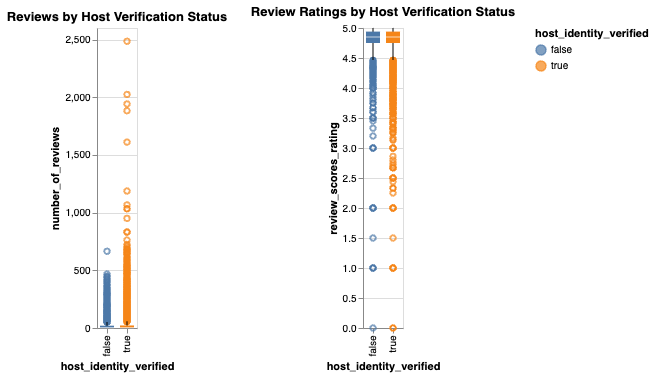

In [9]:
df_identity = df_cleaned[["host_identity_verified", "number_of_reviews", "review_scores_rating"]]

identity_reviews = alt.Chart(df_identity).mark_boxplot().encode(
    alt.X("host_identity_verified:N"),
    alt.Y("number_of_reviews:Q"),
    alt.Color("host_identity_verified:N"),
    tooltip=["host_identity_verified", "number_of_reviews"]
).properties(
    title="Reviews by Host Verification Status"
)

identity_rating = alt.Chart(df_identity).mark_boxplot().encode(
    alt.X("host_identity_verified:N"),
    alt.Y("review_scores_rating:Q"),
    alt.Color("host_identity_verified:N"),
    tooltip=["host_identity_verified", "review_scores_rating"]
).properties(
    title="Review Ratings by Host Verification Status"
)

identity_reviews | identity_rating


## Q2. How do host responses (e.g. response time, acceptance rate) differ between superhosts and non-superhosts, and how does this impact listing success?

The stacked bar chart shows the distribution of response times among superhosts and non-superhosts. We can see that superhosts have a higher proportion of faster response times (e.g., “within an hour” or “within a few hours”) compared to non-superhosts. This suggests that superhosts may prioritize prompt communication as part of their competitive strategy. On the other hand, a greater share of non-superhosts fall into slower categories or have “No response time,” which could reduce their competitiveness if guests prefer hosts who reply quickly.

The box plot indicates that superhosts generally have higher acceptance rates, although there is some overlap. A higher acceptance rate means these hosts are more likely to accept booking requests, which can lead to more reviews and higher visibility in the Airbnb marketplace. However, some non-superhosts also exhibit relatively high acceptance rates, suggesting that being a superhost is not the only way to maintain a competitive edge.

From a Host Behavior & Market Competitiveness standpoint, these findings imply that faster response times and higher acceptance rates may serve as strategic advantages. Hosts who respond quickly and accept more reservations could attract more guests, leading to better listing performance. While superhost status often aligns with these behaviors, non-superhosts can still compete by adopting similar strategies. In future analyses, examining how these behaviors relate to listing success metrics (e.g., number of reviews, average ratings, or booking frequency) would clarify the direct impact on market competitiveness.

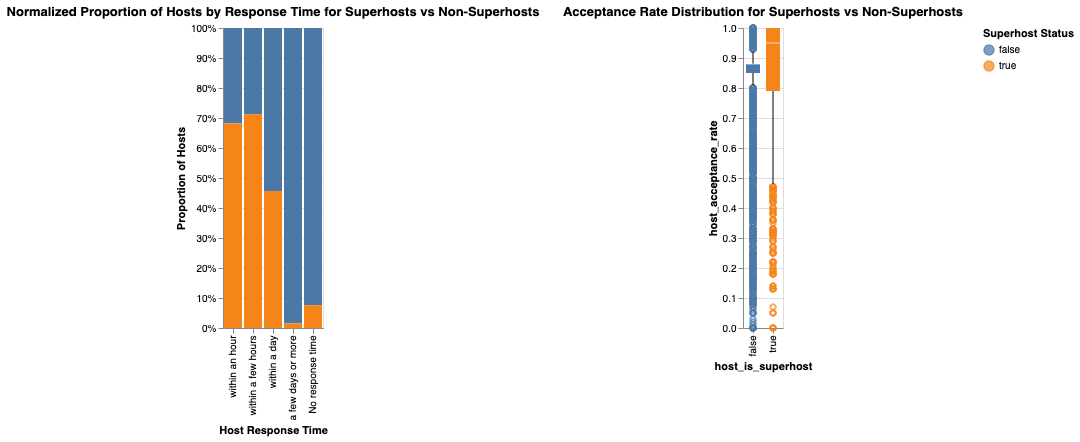

In [10]:
response_time_order = ["within an hour", "within a few hours", "within a day", "a few days or more", "No response time"]

df_host_responses = df_cleaned[["host_is_superhost", "host_response_time", "host_acceptance_rate", "number_of_reviews", "review_scores_rating"]]
df_host_responses.loc[:, "host_response_time"] = pd.Categorical(df_host_responses["host_response_time"], categories=response_time_order, ordered=True)

grouped_data = df_host_responses.groupby(["host_is_superhost", "host_response_time"]).size().reset_index(name="count")
total_counts = grouped_data.groupby("host_is_superhost")["count"].transform("sum")
grouped_data["proportion"] = grouped_data["count"] / total_counts

normalized_chart = alt.Chart(grouped_data).mark_bar().encode(
    alt.X("host_response_time:O", sort=response_time_order, title="Host Response Time"),
    alt.Y("proportion:Q", title="Proportion of Hosts", stack="normalize"),
    alt.Color("host_is_superhost:N", title="Superhost Status"),
    alt.Tooltip(["host_response_time:N", "proportion:Q", "host_is_superhost:N"])
).properties(
    title="Normalized Proportion of Hosts by Response Time for Superhosts vs Non-Superhosts"
)

acceptance_rate_plot = alt.Chart(df_host_responses).mark_boxplot().encode(
    alt.X("host_is_superhost:N"),  
    alt.Y("host_acceptance_rate:Q"),  
    alt.Color("host_is_superhost:N")
).properties(
    title="Acceptance Rate Distribution for Superhosts vs Non-Superhosts"
)

normalized_chart | acceptance_rate_plot


## Q3. How do hosts with multiple listings strategically set their pricing, and how does this impact guest satisfaction?

This plot illustrates how hosts with varying numbers of listings set their average price, and how those listings are rated by guests. Overall, it appears that hosts with multiple listings may keep their prices lower to remain competitive and attract more guests. On the other hand, hosts with fewer listings may set higher prices, possibly offering more unique experiences or specialized services. This finding highlights how host strategies influence pricing and gives insight into market competitiveness. 

However, from the colour scale (guest ratings), we observe that higher or lower pricing strategies do not uniformly guarantee higher guest satisfaction. While certain bins with many listings show slightly lower average ratings, others remain comparable to those of hosts with fewer listings. This suggests that pricing alone may not be the sole driver of guest satisfaction, and that other factors, such as property type, location, or host responsiveness could also influence how guests perceive their stay.


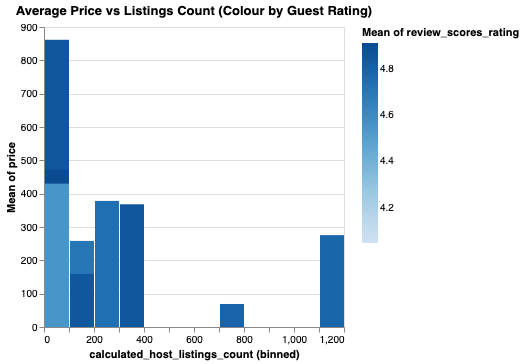

In [11]:
df_listings_price_reviews = df_cleaned[["calculated_host_listings_count", "price", "review_scores_rating"]]

bar_graph = alt.Chart(df_listings_price_reviews).mark_bar().encode(
    alt.X("calculated_host_listings_count:Q", bin=alt.BinParams(maxbins=20)),  
    alt.Y("mean(price):Q"),  
    alt.Color("mean(review_scores_rating):Q", scale=alt.Scale(scheme="blues")), 
    alt.Tooltip(["calculated_host_listings_count:Q", "mean(price):Q", "mean(review_scores_rating):Q"])  
).properties(
    title="Average Price vs Listings Count (Colour by Guest Rating)"
)

bar_graph


# Task Analysis

### Q1

1. Retrieve Value: host_identity_verified, number_of_reviews, review_scores_rating.
2. Filter: Separate data into two groups (verified hosts ("t") vs non-verified hosts ("f")) to compare their success.
3. Characterize Distribution: Use boxplots and histograms to visualize the distribution of number_of_reviews and review_scores_rating.
4. Correlate: Compare the average review count and rating for verified vs. non-verified hosts to see if verification improves success.
5. Find Extremum: Identify the hosts with the highest or lowest reviews and ratings in both groups to check for unusual trends.

### Q2

1. Retrieve Value (Extract Data): host_is_superhost, host_response_time, host_acceptance_rate, number_of_reviews, review_scores_rating. 
2. Filter: Split data into superhosts (host_is_superhost = 't') vs non-superhosts (host_is_superhost = 'f') to compare performance.
3. Sort: Group host_response_time into categories to observe response speed trends.
4. Characterize Distribution: Use stacked bar chart to show the proportion of response times for superhosts vs non-superhosts. Also, create boxplot to compare host_acceptance_rate to see if superhosts have higher booking acceptance.
5. Correlate: Analyze how host_response_time and host_acceptance_rate influence number_of_reviews and review_scores_rating.
6. Find Extremum: Identify superhosts with the highest or lowest acceptance rates and compare their success metrics.

### Q3

1. Retrieve Value: Extract "calculated_host_listings_count", "price", "review_scores_rating".
2. Filter: Group calculated_host_listings_count into bins (e.g. 1-5, 6-20, 21-100) and compare price and ratings across groups.
3. Compute Derived Value: Create Price_Rating_Ratio = price / review_scores_rating to analyze if higher prices lead to lower ratings.
4. Characterize Distribution: Use bar chart to show how the average price changes based on the number of listings a host owns. Also, use review_scores_rating as a colour scale to examine its relationship with pricing strategies.
5. Correlate: Investigate how the number of listings affects pricing and whether pricing influences review_scores_rating.
6. Find Extremum: 
- Identify hosts with the most listings and compare their pricing strategies.
- Identify highest-priced vs lowest-priced listings and compare their guest satisfaction ratings.

# High Fidelity Charts

## Q1. How does host identity verification influence the success of a listing (in terms of reviews and ratings)?

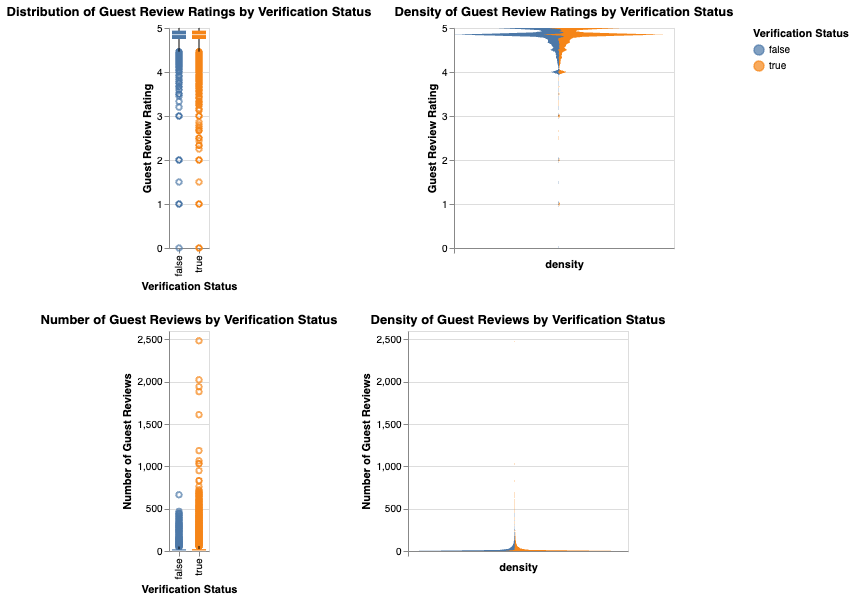

In [12]:
# Minimum Rating Slider
rating_min_slider = alt.binding_range(
    min=0,
    max=5,
    step=0.1,
    name='Min Guest Rating: '
)

rating_min_param = alt.param(
    name='RatingMin',
    bind=rating_min_slider,
    value=0.0  
)

# Maximum Rating Slider
rating_max_slider = alt.binding_range(
    min=0,
    max=5,
    step=0.1,
    name='Max Guest Rating: '
)

rating_max_param = alt.param(
    name='RatingMax',
    bind=rating_max_slider,
    value=5.0  
)

# Filter condition
rating_filter = "(datum.review_scores_rating >= RatingMin) & (datum.review_scores_rating <= RatingMax)"

# Box Plot (Number of Reviews)
box_reviews_interactive = (
    alt.Chart(df_identity)
    .mark_boxplot()
    .encode(
        alt.X("host_identity_verified:N", title="Verification Status"),
        alt.Y("number_of_reviews:Q", title="Number of Guest Reviews"),
        alt.Color("host_identity_verified:N", title="Verification Status"),
        tooltip=["host_identity_verified", "number_of_reviews"]
    )
    .transform_filter(rating_filter)
    .properties(
        title="Number of Guest Reviews by Verification Status", height=220
    )
)

# Violin Plot (Number of Reviews)
violin_reviews = (
    alt.Chart(df_identity)
    .transform_filter(rating_filter)
    .transform_density(
        'number_of_reviews',
        as_=['number_of_reviews', 'density'],
        extent=[0, max(df_identity['number_of_reviews'])],
        groupby=['host_identity_verified']
    )
    .mark_area(orient='horizontal')
    .encode(
        y=alt.Y('number_of_reviews:Q', title='Number of Guest Reviews'),
        x=alt.X(
            'density:Q',
            stack='center',
            axis=alt.Axis(labels=False, values=[0], grid=False, ticks=True)
        ),
        color=alt.Color('host_identity_verified:N', title="Verification Status"),
        tooltip=['host_identity_verified', 'number_of_reviews']
    )
    .properties(
        title='Density of Guest Reviews by Verification Status', width=220,height=220
    )
)

# Box Plot (Review Rating)
box_rating = (
    alt.Chart(df_identity)
    .mark_boxplot()
    .encode(
        alt.X("host_identity_verified:N", title="Verification Status"),
        alt.Y("review_scores_rating:Q", title="Guest Review Rating"),
        alt.Color("host_identity_verified:N", title="Verification Status"),
        tooltip=["host_identity_verified", "review_scores_rating"]
    )
    .properties(
        title="Distribution of Guest Review Ratings by Verification Status", height=220
    )
)

# Violin Plot (Review Rating)
violin_ratings = (
    alt.Chart(df_identity)
    .transform_density(
        'review_scores_rating',
        as_=['review_scores_rating', 'density'],
        extent=[0, 5],
        groupby=['host_identity_verified']
    )
    .mark_area(orient='horizontal')
    .encode(
        y=alt.Y('review_scores_rating:Q', title='Guest Review Rating'),
        x=alt.X(
            'density:Q',
            stack='center',
            axis=alt.Axis(labels=False, values=[0], grid=False, ticks=True)
        ),
        color=alt.Color('host_identity_verified:N', title="Verification Status"),
        tooltip=['host_identity_verified', 'review_scores_rating']
    )
    .properties(
        title='Density of Guest Review Ratings by Verification Status', width=220,height=220
    )
)


upper_plots = box_rating | violin_ratings
lower_plots = box_reviews_interactive | violin_reviews

Q1_chart = (upper_plots & lower_plots).add_params(rating_min_param, rating_max_param)

Q1_chart


### Visualization Overview
This is a 2×2 grid of plots to explore whether hosts with identity verification (host_identity_verified=True) differ from those who are not verified (False). The final view is arranged as follows:
- Top‐Left: A box plot of guest ratings by verification status (static)

- Top‐Right: A violin (density) plot of guest ratings by verification status (static)

- Bottom‐Left: A box plot of number of reviews by verification status (interactive with sliders)

- Bottom‐Right: A violin (density) plot of number of reviews by verification status (interactive with sliders)

Only the bottom two respond to two sliders (Min Guest Rating & Max Guest Rating) that filter out listings with ratings outside the selected range.


### Tasks
I wanted to explore whether verified hosts (host_identity_verified=True) differ significantly from non-verified hosts in two key metrics of “success”:
- Number of Guest Reviews (quantity of feedback).
- Guest Review Ratings (quality of feedback).

This also aimed to let the user filter listings by a chosen range of guest ratings (e.g., only 4.0–5.0 stars) to see whether patterns differ among higher- vs. lower-rated listings.

### Explanation & Justification
Marks: 
- Box Plot: uses lines (for quartiles/whiskers) and points (for outliers)
- Violin (Density) Plot: area

Channels:
- Position: Y‐position encodes the quantitative attribute (guest rating or number of reviews). 
- Colour: Verification status (True vs. False). 

Interaction:
- Sliders: Two sliders (rating_min and rating_max) allow for the filtering out of listings with ratings outside the chosen range, but only for the bottom plots (number of reviews). This allows for users to study smaller subsets in more depth.

Insights: 
- Ratings Distribution (Top Row): Verified and non-verified groups share similar median ratings, but verified hosts occasionally show a few more outliers with very low scores.

- Number of Reviews (Bottom Row): Verified hosts often have extremely high review counts (hundreds or thousands). Narrowing the rating range (e.g., 4.0–5.0) reveals that even among high‐rated listings, some verified hosts stand out with very large numbers of reviews. However, being verified does not guarantee high ratings across the board—the box/violin center points are not drastically different between the two categories.


### Critique
The visualization follows the expressiveness principle by representing ordered data (guest ratings and number of reviews) on the vertical axes, which naturally convey magnitude. The categorical attribute (verification status) is shown on the horizontal axis, splitting the data into True/False groups, and also uses color hue to clearly distinguish the two categories. This approach avoids suggesting any inherent ordering where none exists. Currently, only the bottom two plots respond to the rating sliders, which is visually indicated. However, some users might mistakenly expect the top plots (showing ratings) to update as well. Adding a small label or note to clarify which plots are interactive versus static would improve usability.

## Q2. How do host responses (e.g. response time, acceptance rate) differ between superhosts and non-superhosts, and how does this impact listing success?

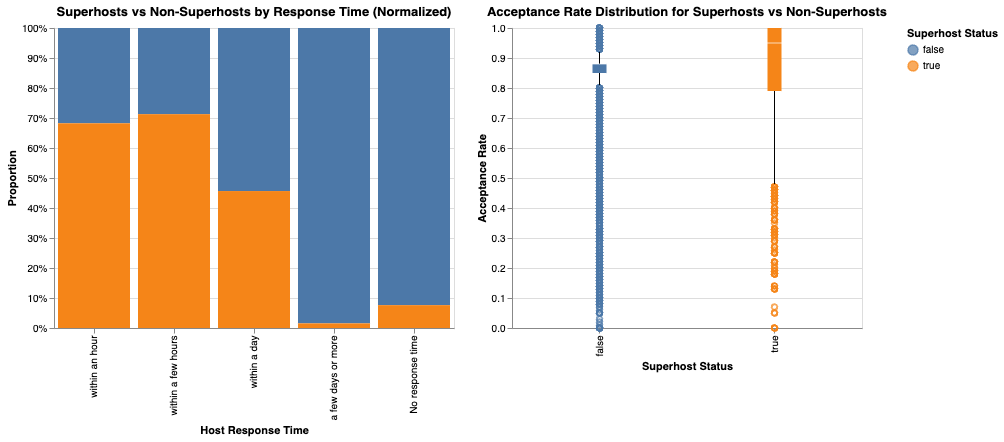

In [13]:

response_time_order = ["All", "within an hour", "within a few hours", "within a day", "a few days or more", "No response time"]

#Drop down
response_time_dropdown = alt.binding_select(
    options=response_time_order,
    name="Response Time: "
)

response_time_param = alt.param(
    name="SelectedResponseTime",
    bind=response_time_dropdown,
    value="All"
)

# Slider (min)
rating_min_slider = alt.binding_range(
    min=0,
    max=5,
    step=0.1,
    name='Min Guest Rating: '
)
rating_min_param = alt.param(
    name='RatingMin',
    bind=rating_min_slider,
    value=0.0  
)

# Slider (max)
rating_max_slider = alt.binding_range(
    min=0,
    max=5,
    step=0.1,
    name='Max Guest Rating: '
)
rating_max_param = alt.param(
    name='RatingMax',
    bind=rating_max_slider,
    value=5.0  
)


df_host_responses = df_cleaned[["host_is_superhost", "host_response_time", "host_acceptance_rate", "number_of_reviews", "review_scores_rating"]]
df_host_responses.loc[:, "host_response_time"] = pd.Categorical(
    df_host_responses["host_response_time"], 
    categories=response_time_order[1:],  # exclude "All"
    ordered=True
)

# Normalized Stack Bar Chart
normalized_chart = alt.Chart(df_host_responses).transform_filter(
    (alt.datum.review_scores_rating >= rating_min_param) &
    (alt.datum.review_scores_rating <= rating_max_param)
).transform_aggregate(
    count='count()',
    groupby=["host_is_superhost", "host_response_time"]
).transform_joinaggregate(
    total='sum(count)',
    groupby=["host_is_superhost"]
).transform_calculate(
    proportion="datum.count / datum.total"
).mark_bar().encode(
    alt.X("host_response_time:O", sort=response_time_order[1:], title="Host Response Time"),
    alt.Y("proportion:Q", title="Proportion", stack="normalize"),
    alt.Color("host_is_superhost:N", title="Superhost Status"),
    alt.Tooltip(["host_response_time:N", "proportion:Q", "host_is_superhost:N"])
).properties(
    title="Superhosts vs Non-Superhosts by Response Time (Normalized)",
    width=400,
    height=300
)


# Box Plot
acceptance_rate_plot = alt.Chart(df_host_responses).transform_filter(
    (alt.datum.review_scores_rating >= rating_min_param) &
    (alt.datum.review_scores_rating <= rating_max_param)
).transform_filter(
    "(SelectedResponseTime == 'All') || (datum.host_response_time == SelectedResponseTime)"
).mark_boxplot().encode(
    alt.X("host_is_superhost:N", title="Superhost Status"),
    alt.Y("host_acceptance_rate:Q", title="Acceptance Rate"),
    alt.Color("host_is_superhost:N", title="Superhost Status"),
    alt.Tooltip(["host_is_superhost", "host_acceptance_rate", "host_response_time"])
).properties(
    title="Acceptance Rate Distribution for Superhosts vs Non-Superhosts",
    width=350,
    height=300
)


Q2_chart = (normalized_chart | acceptance_rate_plot).add_params(
    rating_min_param, rating_max_param, response_time_param
)

Q2_chart


### Visualization Overview
two linked plots to investigate the differences in host responses between superhosts and non‐superhosts. 
- Left: A normalized stacked bar chart that displays the proportion of response time categories (e.g., “within an hour,” “within a few hours,” etc.) for superhosts and non‐superhosts.
- Right: A box plot that shows the distribution of acceptance rates for superhosts and non‐superhosts.
Interactive elements include two rating sliders (Min Guest Rating and Max Guest Rating) and a dropdown for filtering by response time. Only the bottom plot (acceptance rate) and the stacked bar chart respond to these interactive controls.

### Tasks

- Compare Response Behaviours: The objective was to determine whether superhosts tend to reply more quickly on average—such as within an hour or within a few hours—while non‐superhosts are more likely to exhibit slower response times, such as a few days or no response at all.
- Check Acceptance Rate Differences: It was also important to investigate whether superhosts are more likely to accept booking requests and whether these differences remain consistent across varying guest rating ranges (using the sliders) or specific response time categories (using the dropdown).
- Impact on Listing Success: By applying guest ratings as a filter, the analysis sought to examine if hosts with faster response times or higher acceptance rates achieve higher average guest ratings, which would serve as an indicator of greater listing success.

### Explanation & Justification

Marks:
- Normalized Stacked Bar Chart: Uses line and area 
- Box Plot: Uses line (whiskers and quartiles) and point (outliers)

Channels:
- Position: The stacked bar chart uses x‐position to show the proportion (0–100%), while y-position categories the data by response time. The box plot uses x‐position for acceptance rates and y-position for superhost status (True/False).
- Colour: Superhost status (True = orange, False = blue) is redundantly encoded in colour, allowing quick comparison.

Interaction:
- Sliders: Two sliders (Min Guest Rating and Max Guest Rating) filter out listings that fall outside the selected guest rating range, affecting both the normalized bar chart and the box plot. This allows users to focus on specific rating ranges.
- Dropdown Menu: The dropdown filters the data by a selected response time category. This means the box plot can show the acceptance rate distribution for a specific response time, providing a detailed view.

Insights:

Response Time
- Overall, superhosts appear more frequently in the fastest response categories (“within an hour” or “within a few hours”) than non‐superhosts.
- In slower categories like “a few days or more” or “no response time,” non‐superhosts dominate. Superhosts in these slow categories are rare, though they do exist.

Filtering by Guest Rating
- When it is filtered for higher ratings (e.g., 4.6–5.0), very few hosts—superhost or not—have extremely slow response times. This suggests a link between fast response and higher guest ratings.
- For lower‐rated subsets (e.g., max = 3.6), superhosts still predominantly fall into faster response times, indicating even “lower‐rated superhosts” generally maintain quick replies.

Acceptance Rate
- Superhosts show a wider spread in acceptance rates, with some extremely high values but also some lower outliers. Meanwhile, non‐superhosts appear more clustered around ~0.88 acceptance.
- Under certain guest‐rating filters (e.g., 3.6 to 5.0), the difference in box positions can become more pronounced, suggesting superhosts may accept a broader range of bookings (hence higher variance).

Response Time & Acceptance Rate Together
- By using the dropdown, superhosts with quick response times often have slightly higher acceptance rates than non‐superhosts in the same category.
- In the “a few days or more” category, superhosts’ acceptance rate can drop dramatically (around 30%), while non‐superhosts’ acceptance rate distribution covers a wide range (0–88%). This might indicate that those few superhosts who do respond late might also selectively accept requests.

### Critique
Overall, this visualization follows the principles of expressiveness and effectiveness very well. Ordered data such as response times and acceptance rates is displayed on the vertical axes, naturally conveying magnitude, while the categorical attribute (superhost status) is clearly separated on the horizontal axis and reinforced with colour. The normalized stacked bar chart is particularly useful as it addresses the high skew in superhost data, allowing clear percentage comparisons between superhosts and non‐superhosts. The box plot effectively shows the differences in acceptance rate distributions.
The interactive elements, such as sliders and the dropdown, allow users to explore how metrics like response time and acceptance rate change across different guest rating ranges and response time categories. This design helps reveal that superhosts tend to respond faster and have a wider range of acceptance rates, which may contribute to higher guest ratings and greater listing success.


## Q3. How do hosts with multiple listings strategically set their pricing, and how does this impact guest satisfaction?

/tmp/ipykernel_1361/2667057995.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings_price_reviews['listings_count_bin'] = pd.cut(


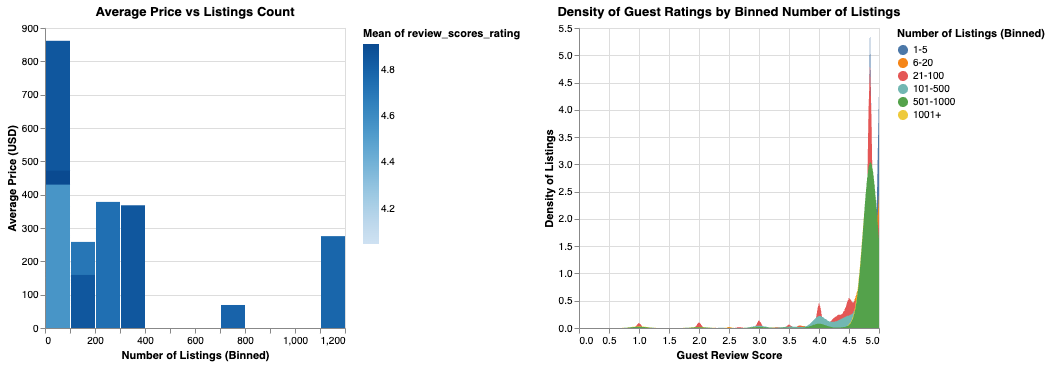

In [14]:
selection = alt.selection_point(
    fields=["listings_count_bin"], 
    bind="legend",   
    toggle=True,
    empty="all"
)

# bins
bins = [1, 5, 20, 100, 500, 1000, float('inf')]
labels = ["1-5", "6-20", "21-100", "101-500", "501-1000", "1001+"]

df_listings_price_reviews['listings_count_bin'] = pd.cut(
    df_listings_price_reviews['calculated_host_listings_count'],
    bins=bins,
    labels=labels,
    right=False
)

# Binned Bar 
bar_graph = alt.Chart(df_listings_price_reviews).mark_bar().encode(
    alt.X("calculated_host_listings_count:Q", bin=alt.BinParams(maxbins=20), title="Number of Listings (Binned)"),  
    alt.Y("mean(price):Q", title="Average Price (USD)"),  
    alt.Color("mean(review_scores_rating):Q"), 
    alt.Tooltip(["calculated_host_listings_count:Q", "mean(price):Q", "mean(review_scores_rating):Q"])  
).properties(
    title="Average Price vs Listings Count"
)

# Density Plot
density_plot = alt.Chart(df_listings_price_reviews).transform_density(
        'review_scores_rating',
        as_=['review_scores_rating', 'density'],
        extent=[0, 5],
        groupby=['listings_count_bin']).mark_area().add_params(selection).encode(
        x=alt.X('review_scores_rating:Q', title="Guest Review Score"),
        y=alt.Y('density:Q', title="Density of Listings"),
        color=alt.Color('listings_count_bin:N', 
                        title="Number of Listings (Binned)",
                        sort=["1-5", "6-20", "21-100", "101-500", "501-1000", "1001+"]), 
        opacity=alt.condition(selection,
                              alt.value(1.0),       
                              alt.value(0.1)),       
        tooltip=['listings_count_bin:N', 'review_scores_rating:Q', 'density:Q']
    ).properties(
        title="Density of Guest Ratings by Binned Number of Listings"
    )

bar_graph | density_plot


### Visualization Overview
This analysis examines whether hosts who manage multiple listings adjust their pricing strategies differently, and how these choices may affect guest satisfaction (as measured by guest review scores). The final visualization consists of:
- Left: A binned bar chart that plots the average price (mean(price)) against binned “number of listings” counts, with a colour scale encoding the mean guest review score (mean(review_scores_rating)).
- Right: A density plot displaying the distribution of guest review scores across each binned group of listing counts. Users can highlight specific bins via a legend‐based selection.

The listing counts are segmented into six categories:

- 1–5 (few listings, possibly individual hosts),
- 6–20 (small‐scale hosts),
- 21–100 (mid‐scale),
- 101–500 (large‐scale),
- 501–1000 (very large‐scale),
- 1001+ (extremely large‐scale).



### Tasks

- Investigate whether hosts with fewer listings set higher nightly rates, perhaps because they offer more personalized or premium accommodations, while larger operators might rely on lower prices to attract volume.
- Examine how average review scores vary across these listing‐count bins and determine if managing more listings influences guest satisfaction, as indicated by higher or lower ratings.
- Enable users to isolate specific listing‐count bins using the legend in the density plot, making it easier to compare only a handful of categories rather than viewing them all at once.

### Explanation & Justification

Marks:
- Bar Chart: Uses line and area
- Density Plot: Area

Channels:
- Position: In the bar chart, x‐position indicates listing‐count bins, y‐position represents average price. In the density plot, x‐position maps guest review scores, while y‐position shows the density value.
- Colour: In the bar chart, a sequential colour encodes mean review scores.

Interaction:
- Legend Multi‐Selection: Clicking each bin label in the density plot’s legend adjusts opacity, allowing comparisons of specific subsets (e.g., comparing “21–100” to “1001+”). Since density plots of different listing counts tend to overlap, the legend selection was chosen as an interaction method. This allows users to filter and display only the selected listing count bins, improving clarity and comparison.


Insights:

- Density Plot Observations: Smaller‐scale hosts (1–5, 6–20, 21–100 listings) generally show fairly consistent distributions of review scores in the 4.0–5.0 range. Bins for large‐scale and very large‐scale hosts (101–500, 501–1000, 1001+) exhibit relatively lower densities in the highest rating segment (4.5–5.0), suggesting that, on average, these operators might receive fewer top‐tier scores.

- Pricing Patterns: Hosts with few listings sometimes charge notably high nightly rates (e.g., $800+), possibly indicating luxury properties or unique experiences. More extensive operations (100+ listings) typically display a lower mean price, hinting at a volume‐driven strategy.

- Scale and Guest Satisfaction: Data points suggest that small‐scale hosts who charge higher prices may also maintain strong review scores, potentially due to focused attention or special offerings. Large operators, on the other hand, tend to reduce nightly rates, aligning with a standardized or budget model that may sacrifice some aspects of guest experience.


### Critique
Overall, the visualization effectively uses aligned spatial channels to compare numeric data (listings count vs. mean price vs. review scores). The colour gradient in the bar chart helps convey a secondary measure (mean review rating), and the density plot illustrates how rating distributions vary among different bins. However, it may not be immediately apparent that the legend is selectable. Adding a brief label or explanation to indicate this interactive feature would help users better understand how to engage with the visualization.